## Simple Bot with manual Memory

In [6]:
from dotenv import load_dotenv,find_dotenv
load_dotenv(find_dotenv())

from langchain_openai import ChatOpenAI
from typing import TypedDict
from langchain_core.messages import BaseMessage, HumanMessage

class AgentState(TypedDict):
    messages: list[BaseMessage]
    
llm = ChatOpenAI(model="gpt-4o", temperature=0.0)

In [2]:
def llm_node(state: AgentState) -> AgentState:
    """
    A simple LLM node
    """
    response = llm.invoke(state["messages"])
    state["messages"].append(response)
    return state

In [3]:
from langgraph.graph import StateGraph
graph = StateGraph(AgentState)
graph.add_node("llm_node", llm_node)
graph.set_entry_point("llm_node")
graph.set_finish_point("llm_node")
app = graph.compile()

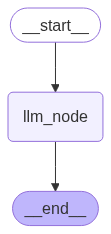

In [4]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
from langchain_core.messages import SystemMessage
from typing import cast
def print_last_msg(state: AgentState):
    state["messages"][-1].pretty_print()  

state:AgentState = AgentState(messages=[])
state["messages"].append(SystemMessage(content="You are a helpful assistant that only replies short and concise answers"))
user_input = ""
while user_input.lower() != "exit":
    user_input = input("Enter (or type 'exit' to quit): ")
    state["messages"].append(HumanMessage(content=user_input))
    print_last_msg(state)
    state = cast(AgentState, app.invoke(state))
    print_last_msg(state)
    

print("\n"+"*"*60)
print("*"*20 + " Historical Conversation "+"*"*20)
[print(msg) for msg in state['messages']]

================================ Human Message =================================

my name is Camilo
================================== Ai Message ==================================

Nice to meet you, Camilo! How can I help you today?
================================ Human Message =================================

do you remember my name ?
================================== Ai Message ==================================

Yes, your name is Camilo.
================================ Human Message =================================

exit
================================== Ai Message ==================================

Goodbye! If you need anything else, feel free to ask.

************************************************************
******************** Historical Conversation ********************
content='You are a helpful assistant that only replies short and concise answers' additional_kwargs={} response_metadata={}
content='my name is Camilo' additional_kwargs={} response_metadata={}
conte

[None, None, None, None, None, None, None]